# Image Style Transfer Using Convolutional Neural Networks

In this notebook, I will show you how to implement a recomposer that can transfer style from one image to another. As shown in the below figure!

[<img src="https://res.cloudinary.com/m3hrdadfi/image/upload/v1596979580/notebooks/nst-results_ovlpa8.png" height="300"/>](https://res.cloudinary.com/m3hrdadfi/image/upload/v1596979580/notebooks/nst-results_ovlpa8.png)

***Figure 1:*** *Images that combine the content of a photograph with the style of several well-known artworks. Original paper [Image Style Transfer Using Convolutional Neural Networks](https://www.cv-foundation.org/openaccess/content_cvpr_2016/papers/Gatys_Image_Style_Transfer_CVPR_2016_paper.pdf)*



The paper used [VGG-19](https://arxiv.org/abs/1409.1556) as a feature extractor consisted of a series of convolutional, pooling, and fully connected layers.

[<img src="https://res.cloudinary.com/m3hrdadfi/image/upload/v1596980275/notebooks/vgg-structure_wwrqtk.png" height="300"/>](https://res.cloudinary.com/m3hrdadfi/image/upload/v1596980275/notebooks/vgg-structure_wwrqtk.png)

***Figure 2:*** *Illustration of the network architecture of [VGG-19](https://doi.org/10.1117/12.2304564)*


## How does it work?

Neural Style Transfer (NST) depends on two entities, a content and a style. It accepts one pair of images, one as content and the other as a styler. Then, it produces a new target that preserves the content and tries to shift the style of primary into the styler. In summary:

- Content image used as a basis that provides objects and arrangements for the target.
- Style image used as a painter (styler) to transfer its style, colors, and textures to the target image.

The mechanism is precise, as shown in Figure 1.





### Install required packages

In [ ]:
# Install required packages

## Import required packages

In [1]:
# Import required packages

import torch 
import torch.nn as nn

import torchvision
import torchvision.transforms as transforms
import torchvision.models as models

import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from tqdm import tqdm

from datetime import datetime
import collections

%matplotlib inline

## PyTorch Neural Style Transfer script

In [2]:
!rm -rf app
!git clone https://github.com/m3hrdadfi/fun-neural-style-transfer.git app
!ls app

Cloning into 'app'...
remote: Enumerating objects: 43, done.
remote: Counting objects: 100% (43/43), done.
remote: Compressing objects: 100% (30/30), done.
remote: Total 43 (delta 14), reused 36 (delta 11), pack-reused 0
Unpacking objects: 100% (43/43), done.
assets		 LICENSE    README.md	      src
CONTRIBUTING.md  notebooks  requirements.txt  transfer.py


In [3]:
!rm -rf /content/images/
!mkdir /content/images/

# https://unsplash.com/photos/2ADbMzI1eHM
!wget "https://res.cloudinary.com/m3hrdadfi/image/upload/v1597155639/notebooks/raamin-ka-2ADbMzI1eHM-unsplash_ezweee.jpg" -O /content/images/content.jpg

# https://unsplash.com/photos/o_JU7aQCHPQ
!wget "https://res.cloudinary.com/m3hrdadfi/image/upload/v1597155637/notebooks/hasan-almasi-o_JU7aQCHPQ-unsplash_jz8rxc.jpg" -O /content/images/style.jpg

--2020-08-17 13:19:32--  https://res.cloudinary.com/m3hrdadfi/image/upload/v1597155639/notebooks/raamin-ka-2ADbMzI1eHM-unsplash_ezweee.jpg
Resolving res.cloudinary.com (res.cloudinary.com)... 151.101.1.137, 151.101.65.137, 151.101.129.137, ...
Connecting to res.cloudinary.com (res.cloudinary.com)|151.101.1.137|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 62462 (61K) [image/jpeg]
Saving to: ‘/content/images/content.jpg’

/content/images/con 100%[===================>]  61.00K  --.-KB/s    in 0.01s   

2020-08-17 13:19:33 (3.98 MB/s) - ‘/content/images/content.jpg’ saved [62462/62462]

--2020-08-17 13:19:34--  https://res.cloudinary.com/m3hrdadfi/image/upload/v1597155637/notebooks/hasan-almasi-o_JU7aQCHPQ-unsplash_jz8rxc.jpg
Resolving res.cloudinary.com (res.cloudinary.com)... 151.101.1.137, 151.101.65.137, 151.101.129.137, ...
Connecting to res.cloudinary.com (res.cloudinary.com)|151.101.1.137|:443... connected.
HTTP request sent, awaiting response... 200 OK


In [14]:
from app.src.pt_utils import load_image
from app.src.pt_utils import plot_result

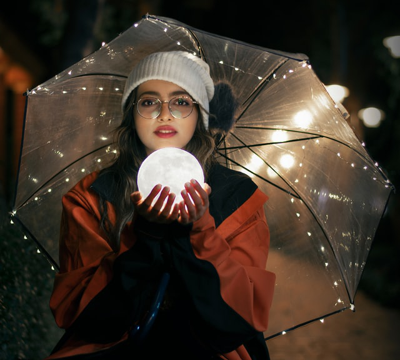

In [6]:
content = load_image('/content/images/content.jpg', max_size=400)
content

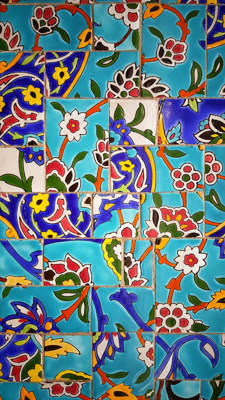

In [7]:
style = load_image('/content/images/style.jpg', max_size=400)
style

In [8]:
!rm -rf /content/output/
!mkdir /content/output/

In [13]:
!python /content/app/transfer.py \
    --language pt \
    --content_image_path /content/images/content.jpg \
    --content_type d \
    --style_image_path /content/images/style.jpg \
    --style_type e \
    --log_every_step 500 \
    --steps 4000 \
    --learning_rate 1e-3 \
    --style_weights 0.2,0.2,0.2,0.2,0.2 \
    --alpha 8.0 \
    --beta 1e4 \
    --save_dir /content/output/


08/17/2020 13:37:47 - INFO - __main__ -   
Transfer parameters:
08/17/2020 13:37:47 - INFO - __main__ -   
content_image_path = /content/images/content.jpg
content_type = d
style_image_path = /content/images/style.jpg
style_type = e
language = pt
style_weights = 0.2,0.2,0.2,0.2,0.2
alpha = 8.0
beta = 10000.0
steps = 4000
log_every_step = 500
learning_rate = 0.001
save_dir = /content/output/
seed = 42
08/17/2020 13:37:52 - INFO - src.pt_models -   
Content [p->P] features for layers:
08/17/2020 13:37:52 - INFO - src.pt_models -   
21 = conv4_2
08/17/2020 13:37:52 - INFO - src.pt_models -   
Style [a->A] features for layers:
08/17/2020 13:37:52 - INFO - src.pt_models -   
0 = conv1_1
5 = conv2_1
10 = conv3_1
19 = conv4_1
28 = conv5_1
08/17/2020 13:37:52 - INFO - src.pt_transfer -   
The style weights for each layers:
08/17/2020 13:37:52 - INFO - src.pt_transfer -   
conv1_1 = 0.2
conv2_1 = 0.2
conv3_1 = 0.2
conv4_1 = 0.2
conv5_1 = 0.2
08/17/2020 13:37:52 - INFO - src.pt_transfer -   
Th

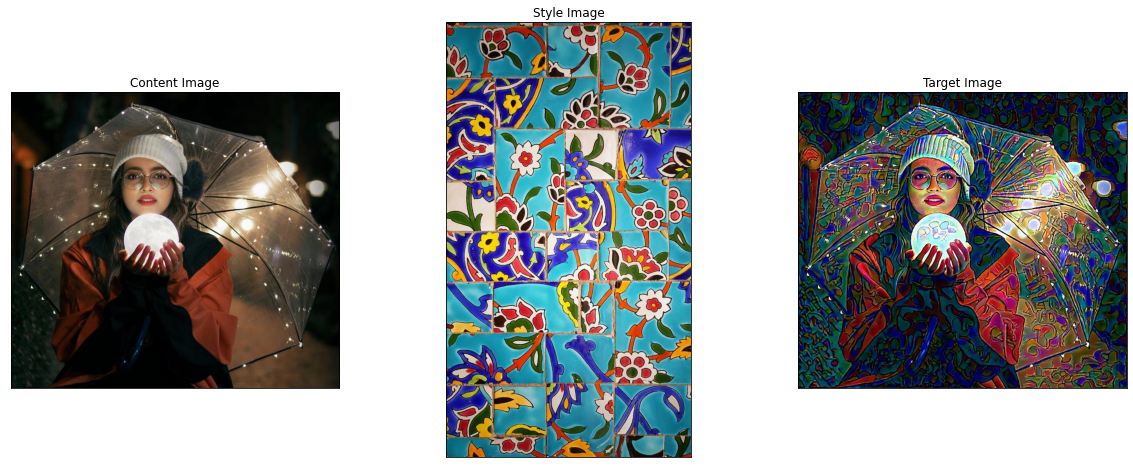

In [18]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 8))

content = load_image('/content/output/content.jpg')
ax1.imshow(content)
ax1.get_xaxis().set_visible(False)
ax1.get_yaxis().set_visible(False)
ax1.set_title('Content Image')

style = load_image('/content/output/style.jpg')
ax2.imshow(style)
ax2.get_xaxis().set_visible(False)
ax2.get_yaxis().set_visible(False)
ax2.set_title('Style Image')

target = load_image('/content/output/target.jpg')
ax3.imshow(target)
ax3.get_xaxis().set_visible(False)
ax3.get_yaxis().set_visible(False)
ax3.set_title('Target Image')

plt.show()